A notebook to perform sequence clustering with this data
Source: https://www.ncbi.nlm.nih.gov/sra/SRX26494648%5Baccn%5D


### Imports

In [43]:
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## FastQ Tools Preproccesing 🧪

In [44]:
# will need to alter this when switching to codespace 

# local path
! /Users/milton/anaconda3/bin/fastqc /Users/milton/Documents/University/Dissertation/git/DNA-Data/SRR31112377.fastq -o /Users/milton/Documents/University/Dissertation/git/DNA-Data/fastq_reports/

# codespace path
# ! /usr/bin/fastqc /workspaces/DNA-Data/SRR31112377.fastq -o /workspaces/DNA-Data/fastq_reports/

null
Started analysis of SRR31112377.fastq
Approx 5% complete for SRR31112377.fastq
Approx 10% complete for SRR31112377.fastq
Approx 15% complete for SRR31112377.fastq
Approx 20% complete for SRR31112377.fastq
Approx 25% complete for SRR31112377.fastq
Approx 30% complete for SRR31112377.fastq
Approx 35% complete for SRR31112377.fastq
Approx 40% complete for SRR31112377.fastq
Approx 45% complete for SRR31112377.fastq
Approx 50% complete for SRR31112377.fastq
Approx 55% complete for SRR31112377.fastq
Approx 60% complete for SRR31112377.fastq
Approx 65% complete for SRR31112377.fastq
Approx 70% complete for SRR31112377.fastq
Approx 75% complete for SRR31112377.fastq
Approx 80% complete for SRR31112377.fastq
Approx 85% complete for SRR31112377.fastq
Approx 90% complete for SRR31112377.fastq
Approx 95% complete for SRR31112377.fastq
Analysis complete for SRR31112377.fastq


### Results from report (viewable via html file)
- Per Base Sequence Content (Yellow Warning)
    - Indication that nucleotide is not balanced across the sequence
    - A,T,G,C freqs should be pretty much equal
    - Could be bias in library prep or contamination
- Per Sequence GC Content (Red Cross)
    - GC distro does not match GC content
    - skewed distro could be contamination from another organism or technical bias
- Sequence Length Distribution (Yellow Warning)
    - Reads have variable lengths
    - ! shouldn't be pre-trimmed double check that !
- Sequence Duplication Levels (Red Cross)
    - High duplication suuggests artifacts or low diversity.
    - Bit of an issue (perhaps remove duplicates?)
    
Everything else seems ok.

In [52]:
# NOTE: this code cannot be run without fastp installation, install in codespace!
!fastp -i SRR31112377.fastq -o fastq_reports/output.fastq -h fastp_reports/report.html -j fastp_reports/report.json --cut_right --cut_window_size 4 --qualified_quality_phred 20


Detecting adapter sequence for read1...
No adapter detected for read1

Read1 before filtering:
total reads: 1389162
total bases: 151004417
Q20 bases: 151004417(100%)
Q30 bases: 151004417(100%)

Read1 after filtering:
total reads: 1388473
total bases: 150980302
Q20 bases: 150980302(100%)
Q30 bases: 150980302(100%)

Filtering result:
reads passed filter: 1388473
reads failed due to low quality: 0
reads failed due to too many N: 689
reads failed due to too short: 0
reads with adapter trimmed: 0
bases trimmed due to adapters: 0

Duplication rate (may be overestimated since this is SE data): 16.9656%

JSON report: fastp_reports/report.json
HTML report: fastp_reports/report.html

fastp -i SRR31112377.fastq -o fastq_reports/output.fastq -h fastp_reports/report.html -j fastp_reports/report.json --cut_right --cut_window_size 4 --qualified_quality_phred 20 
fastp v0.24.0, time used: 7 seconds


### Fastp results

This is trimming and filtering, adapter triming, quality filtering, length filtering and if I added a -d flag I could have removed duplicates too if i deemed it necessary. 

1. No adapter detected = no contamination = good
2. Before n after loss of 689 reads due to too many Ns 
3. 100% Q20 & Q30 bases so pretty good quality data
4. Duplication rate 16.97% this might be expected? not sure 
5. qual thred 20 is like a threshold which will trim bases with lower than 20. 
6. cut right trims are the end of the read (recommened due to illumin tends to degrade base calls near end?)

concluding, did perform minor trimming, adapter trim wasn't applied as there wasn't any, low qual = 0 therefore it only removeed reads with too many N's (i believe these are called ambigious bases)

In [46]:
! /Users/milton/anaconda3/bin/fastqc /Users/milton/Documents/University/Dissertation/git/DNA-Data/fastp_reports/output.fastq -o /Users/milton/Documents/University/Dissertation/git/DNA-Data/fastq_reports/

null
Started analysis of output.fastq
Approx 5% complete for output.fastq
Approx 10% complete for output.fastq
Approx 15% complete for output.fastq
Approx 20% complete for output.fastq
Approx 25% complete for output.fastq
Approx 30% complete for output.fastq
Approx 35% complete for output.fastq
Approx 40% complete for output.fastq
Approx 45% complete for output.fastq
Approx 50% complete for output.fastq
Approx 55% complete for output.fastq
Approx 60% complete for output.fastq
Approx 65% complete for output.fastq
Approx 70% complete for output.fastq
Approx 75% complete for output.fastq
Approx 80% complete for output.fastq
Approx 85% complete for output.fastq
Approx 90% complete for output.fastq
Approx 95% complete for output.fastq
Analysis complete for output.fastq


report comparison of fastq file before and after fastp didn't yield much results 

In [47]:
!head -n 8 fastp_reports/output.fastq

@SRR31112377.1 M00305:354:000000000-KRJCN:1:1101:18677:1921 length=106
AGGATGGGCGCATTTCGGCTTTAGGGTGCCAGCATTTTAGCATTACTTCATATCTGTTCCAAAAAGAAAGACATGCTGTAAGAGACCCTTTGAAGGCAGGCATTTC
+SRR31112377.1 M00305:354:000000000-KRJCN:1:1101:18677:1921 length=106
??????????????????????????????????????????????????????????????????????????????????????????????????????????
@SRR31112377.1 M00305:354:000000000-KRJCN:1:1101:18677:1921 length=106
TTAATGCCTGCCTTCTTTGGTTCTCTTACAGCTTGTCTTTCTTTTTGGTTCTGCTTTGAAGTATTGCTAAAATGCTGGCACCCTATTGCCGAAATGCGCCCATCCT
+SRR31112377.1 M00305:354:000000000-KRJCN:1:1101:18677:1921 length=106
??????????????????????????????????????????????????????????????????????????????????????????????????????????


- data is single-end 
    - paired-end data would have headers 1/1 and 1/2 for forward and reverse read
- thus use -s flag when handling to specify SE

In [48]:
# Removing duplicates; commented out because might not be contextually right to do so. Furthemore, could harm clustering.
# Code will remain in case it is needed in the future.

# !seqkit rmdup -s -i fastp_reports/output.fastq -o dedup.fastq

removal of duplicates
- rmdup
    - removes duplicates
- -s
    - flag which specifies single-end-mode 
- -i 
    - flag for input file as used before 
- -o 
    - flag for output file as also used before

## Data Exploration & More Preprocessing 🚀

### Quick FastQ lecture for context and referance

What is makes up a FastQ file?

    1. Line 1: Header
    This line provides info about the read such as sequencing machine identifier and read indentifier.

    2. Line 2: Sequence
    This is what we want it is the actual sequence of nucleotides since I'm working with DNA we will be looking for A,T,C and G. 

    3. Line 3: Plus Line
    Just a seperator denoted by +

    4. Line 4: Quality Scores
    ASCII characters which correspond to the quality score for a nucleotide in the seq. -> (a measure of confidence seq machine has in that base call) 

In [49]:
# path to FastQ file
file_path = 'fastp_reports/output.fastq'

# read and print the first 8 lines of the file
with open(file_path, 'r') as file:
    for i in range(8):
        print(file.readline().strip())  # .strip() removes trailing newline characters

@SRR31112377.1 M00305:354:000000000-KRJCN:1:1101:18677:1921 length=106
AGGATGGGCGCATTTCGGCTTTAGGGTGCCAGCATTTTAGCATTACTTCATATCTGTTCCAAAAAGAAAGACATGCTGTAAGAGACCCTTTGAAGGCAGGCATTTC
+SRR31112377.1 M00305:354:000000000-KRJCN:1:1101:18677:1921 length=106
??????????????????????????????????????????????????????????????????????????????????????????????????????????
@SRR31112377.1 M00305:354:000000000-KRJCN:1:1101:18677:1921 length=106
TTAATGCCTGCCTTCTTTGGTTCTCTTACAGCTTGTCTTTCTTTTTGGTTCTGCTTTGAAGTATTGCTAAAATGCTGGCACCCTATTGCCGAAATGCGCCCATCCT
+SRR31112377.1 M00305:354:000000000-KRJCN:1:1101:18677:1921 length=106
??????????????????????????????????????????????????????????????????????????????????????????????????????????


displaying data head
- r is used to have file in read mode
- readline in combo with a loop means i can read and process line by line which is more efficient for big files
- sequence as seen above is in second line (IMPORTANT)


In [50]:
# test to see if i can extract sequence with my newfound knowledge stated above 
sequences = []

file_path = "fastp_reports/output.fastq"

with open(file_path, 'r') as file:
    for i in range(8):  # loop through the first 8 records aka 4 lines per record
        file.readline()  # skip the header line
        sequence = file.readline().strip()  # read and strip the sequence line
        file.readline()  # skip the plus line
        file.readline()  # skip the quality line
        sequences.append(sequence)  # keep sequence

print(sequences)

['AGGATGGGCGCATTTCGGCTTTAGGGTGCCAGCATTTTAGCATTACTTCATATCTGTTCCAAAAAGAAAGACATGCTGTAAGAGACCCTTTGAAGGCAGGCATTTC', 'TTAATGCCTGCCTTCTTTGGTTCTCTTACAGCTTGTCTTTCTTTTTGGTTCTGCTTTGAAGTATTGCTAAAATGCTGGCACCCTATTGCCGAAATGCGCCCATCCT', 'TTTTTTTTTCTTCCTTTTTCTTCCTCTTTTTTTCTTTTTTTTTTTAGCTATCTTTTCTTTCCTGTATTCACTAGCCTCTATTAGTATGCCCCTGATATCGGAAGTGCGTCGTGTAGGGAATGTTTGTTCCTCTATGTTTTTTTCTCGTTTT', 'GAGGATGGCAACAGAAGAGTAAAGGACCCAAGAAAACTGCTAAATCAAAAAAAAAGAAACCTTTAAAAAAAAAACCTACACCTGTGCTATTACCACAGTCAACGCAACAAAAACAAAAGCAGGC', 'TCCTTCTTTTGTTTTTTTTTCTTTTTCTGTGGTTATAGCACAGGTGTCGTTTTTTTTTTTTTTTGTTTCTTTTTTTTTGTTTTTGCTGTTTTCTTTTTTCCTTTTCTCTTCTTTTTCCTTCCTCTTATCTTTATTTCGTCGTGTTTTTTTT', 'CATATTTGCATGGGGTGTGGCCACCATCTTGTTTTGATTTCCCTTTTTCCCAGCCTTATTCCCTTCAAAGCTTTGTTCTGGGAAAATGGTCACATACCCTCTCACTCATTTGTTTTCTTCTCTCCTCCCTGCTTCTTTCTCCTACAATATC', 'TTTTTTTTTCTTTTTCTTTTTTTTTATTTTACTTCACTTTTTTTTTTTTTTCTTTGCCCCTTTTCCCTTACCACTTCTTTGTAGGTCCTATGGCTGGGACAACGTGAATTCATATCAAGATGGTTGCCACACCCCTTTCTAATCTTTTTTC', 'CTGGTAGATGCCGGACAGCGTGAGCCTCTT

PROGRESS!!!
*consult with Kakia to see if this is the correct approach.
- note: I could loop this through the entire file if so.

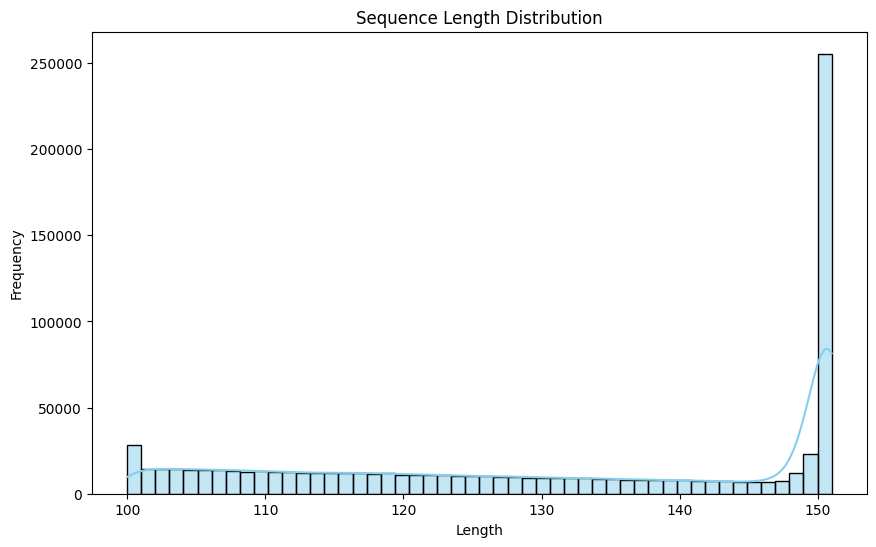

In [51]:
with open(file_path, 'r') as file:
    while True:
        header = file.readline()        # } using header to control and break loop  
        if not header:
            break
        sequence = file.readline().strip()
        file.readline()  # skip the plus line
        file.readline()  # skip the quality line
        sequences.append(sequence)

# counts length of each sequence
seq_lengths = [len(seq) for seq in sequences]

# histogram of sequence lengths
plt.figure(figsize=(10,6))
sns.histplot(seq_lengths, kde=True, bins=50, color="skyblue")
plt.title('Sequence Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

- slight bimodal distro
- right skewed distro
  - log transform?
- 150 suggests mosts seqs are this length